# Model

In [ ]:
model_dir = '/content/drive/MyDrive/thesis/models'

In [ ]:
num_classes = 2
model = models.alexnet(pretrained=True)
model.classifier[6] = nn.Linear(4096, num_classes)

model.eval()

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
class AllConvNet(nn.Module):
    def __init__(self, input_size, n_classes=10, **kwargs):
        super(AllConvNet, self).__init__()
        self.conv1 = nn.Conv2d(input_size, 96, 3, padding=1)
        self.conv2 = nn.Conv2d(96, 96, 3, padding=1)
        self.conv3 = nn.Conv2d(96, 96, 3, padding=1, stride=2)
        self.conv4 = nn.Conv2d(96, 192, 3, padding=1)
        self.conv5 = nn.Conv2d(192, 192, 3, padding=1)
        self.conv6 = nn.Conv2d(192, 192, 3, padding=1, stride=2)
        self.conv7 = nn.Conv2d(192, 192, 3, padding=1)
        self.conv8 = nn.Conv2d(192, 192, 1)

        self.class_conv = nn.Conv2d(192, n_classes, 1)


    def forward(self, x):
        x_drop = F.dropout(x, .2)
        conv1_out = F.relu(self.conv1(x_drop))
        conv2_out = F.relu(self.conv2(conv1_out))
        conv3_out = F.relu(self.conv3(conv2_out))
        conv3_out_drop = F.dropout(conv3_out, .5)
        conv4_out = F.relu(self.conv4(conv3_out_drop))
        conv5_out = F.relu(self.conv5(conv4_out))
        conv6_out = F.relu(self.conv6(conv5_out))
        conv6_out_drop = F.dropout(conv6_out, .5)
        conv7_out = F.relu(self.conv7(conv6_out_drop))
        conv8_out = F.relu(self.conv8(conv7_out))

        class_out = F.relu(self.class_conv(conv8_out))
        pool_out = F.adaptive_avg_pool2d(class_out, 1)
        pool_out.squeeze_(-1)
        pool_out.squeeze_(-1)
        return pool_out

allconv = AllConvNet(input_size=3, n_classes=2)
allconv.eval()

AllConvNet(
  (conv1): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(192, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv7): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(192, 192, kernel_size=(1, 1), stride=(1, 1))
  (class_conv): Conv2d(192, 2, kernel_size=(1, 1), stride=(1, 1))
)

In [ ]:
att_model = models.alexnet(pretrained=True)
att_model.classifier[6] = nn.Linear(4096, num_classes)
att_model.features = nn.Sequential(
    AttConv(num_in_chan=3, num_out_chan=64, kernel_size=11),
    # nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2), nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(64, 192, kernel_size=5, padding=1), nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(192, 384, kernel_size=3, padding=1), nn.ReLU(inplace=True),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
    nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3, stride=2),
    )

att_model.eval()

AlexNet(
  (features): Sequential(
    (0): AttConv()
    (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_f

In [ ]:
from torchsummary import summary
att_model.to(device)
summary(att_model, (3,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 63, 63]          23,296
              ReLU-2           [-1, 64, 63, 63]               0
         MaxPool2d-3           [-1, 64, 31, 31]               0
           AttConv-4          [-1, 192, 27, 27]               0
         MaxPool2d-5          [-1, 192, 13, 13]               0
            Conv2d-6          [-1, 384, 13, 13]         663,936
              ReLU-7          [-1, 384, 13, 13]               0
            Conv2d-8          [-1, 256, 13, 13]         884,992
              ReLU-9          [-1, 256, 13, 13]               0
           Conv2d-10          [-1, 256, 13, 13]         590,080
             ReLU-11          [-1, 256, 13, 13]               0
        MaxPool2d-12            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-13            [-1, 256, 6, 6]               0
          Dropout-14                 [-

# Training

### Setting

In [ ]:
torch.cuda.empty_cache()

Split `df_train` into Train and Valid sets

In [ ]:
# Split into Train and Test sets
train_data, valid_data = train_test_split(df_train, test_size=0.2, random_state=13, stratify=df_train.target.values)
train_data = train_data.reset_index()

valid_data, test_data = train_test_split(valid_data, test_size=0.5, random_state=13, stratify=valid_data.target.values)
valid_data = valid_data.reset_index()
test_data = test_data.reset_index()

Plot Train and Valid diagnosis distribution

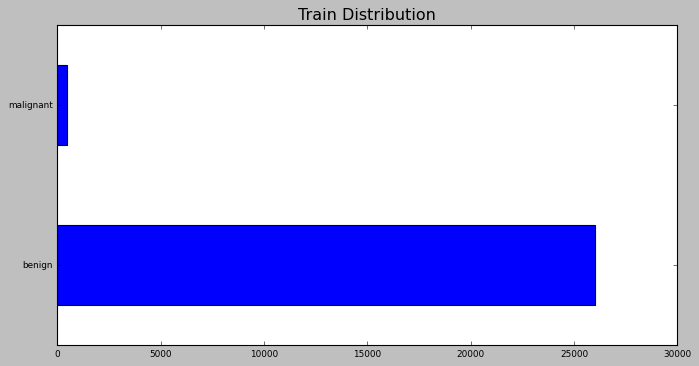

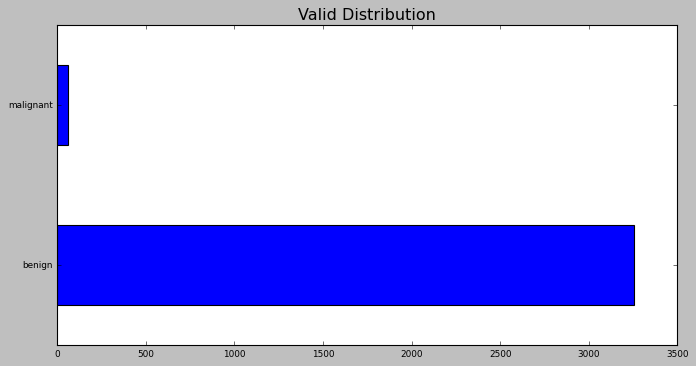

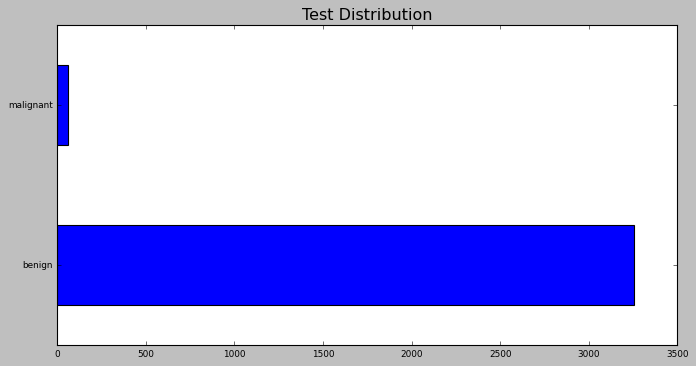

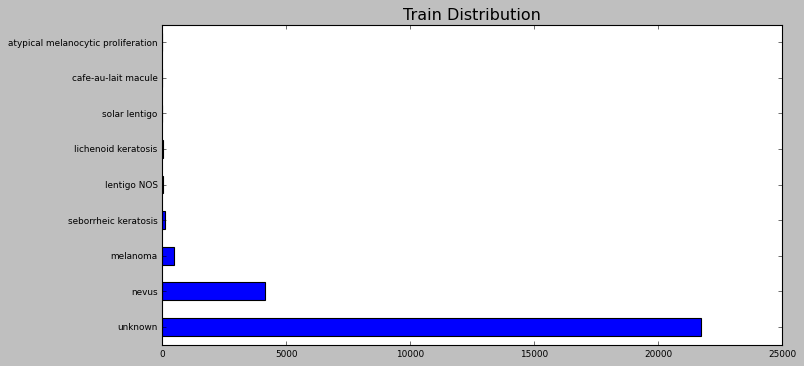

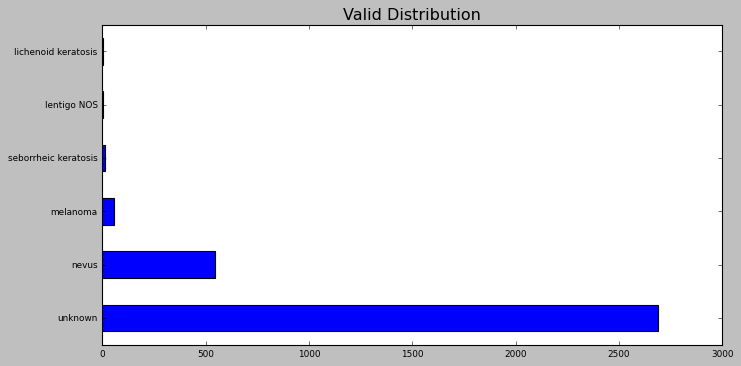

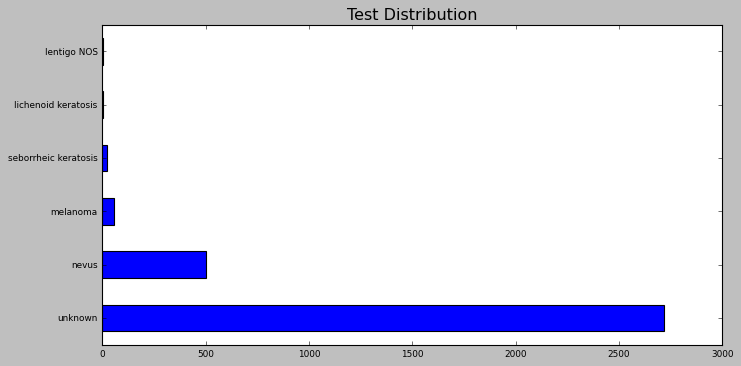

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot Train and Test cell type distribution
train_data.benign_malignant.value_counts(sort=True, ascending=False).plot(kind="barh", title="Train Distribution", fontsize=8,
                                                                   rot= 0, figsize=(10,5))
plt.savefig('/content/drive/MyDrive/thesis/outputs/splited_train_data.png', bbox_inches='tight')
plt.show()
plt.clf()

valid_data.benign_malignant.value_counts(sort=True, ascending=False).plot(kind="barh", title="Valid Distribution", fontsize=8,
                                                                  rot= 0, figsize=(10,5))
plt.savefig('/content/drive/MyDrive/thesis/outputs/splited_valid_data.png', bbox_inches='tight')
plt.show()
plt.clf()

test_data.benign_malignant.value_counts(sort=True, ascending=False).plot(kind="barh", title="Test Distribution", fontsize=8,
                                                                  rot= 0, figsize=(10,5))
plt.savefig('/content/drive/MyDrive/thesis/outputs/splited_test_data.png', bbox_inches='tight')
plt.show()
plt.clf()


train_data.diagnosis.value_counts(sort=True, ascending=False).plot(kind="barh", title="Train Distribution", fontsize=8, rot= 0, figsize=(10,5))
plt.show()
plt.clf()

valid_data.diagnosis.value_counts(sort=True, ascending=False).plot(kind="barh", title="Valid Distribution", fontsize=8, rot= 0, figsize=(10,5))
plt.show()
plt.clf()

test_data.diagnosis.value_counts(sort=True, ascending=False).plot(kind="barh", title="Test Distribution", fontsize=8, rot= 0, figsize=(10,5))
plt.show()
plt.clf()

Class imbalance problem :

In [ ]:
from sklearn.utils import resample
from sklearn.utils import shuffle

print(len(train_data))
# Separate minority and majority classes
malignant = train_data.loc[train_data['benign_malignant'] == 'malignant']
benign = train_data.loc[train_data['benign_malignant'] == 'benign']

# Upsample minority
malignant_upsampled = resample(malignant,
                               replace=True,
                               n_samples=len(benign),
                               random_state=13)

train_data = pd.concat([benign, malignant_upsampled])
train_data = shuffle(train_data)
train_data

26500


,index,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,filepath,site_head/neck,site_lower extremity,site_oral/genital,site_palms/soles,site_torso,site_upper extremity,site_nan,n_images,image_size,diagnosis_idx
2657,23352,ISIC_7098141,IP_9453080,-1.0,0.666667,torso,melanoma,malignant,1,10,1872,1053,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,0,0,0,1,0,0,3.496508,9.749287,4
7597,10149,ISIC_3144222,IP_4615697,1.0,0.888889,NaN,melanoma,malignant,1,13,2592,1936,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,0,0,0,0,0,1,1.609438,10.272945,4
16912,28977,ISIC_8767759,IP_7279218,-1.0,0.333333,lower extremity,nevus,benign,0,4,1872,1053,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,1,0,0,0,0,0,2.079442,9.718061,5
10883,16214,ISIC_4960784,IP_9663529,-1.0,0.833333,upper extremity,melanoma,malignant,1,2,1779,1779,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,0,0,0,0,1,0,1.386294,9.981004,4
15514,31327,ISIC_9467292,IP_2908137,-1.0,0.500000,torso,nevus,benign,0,13,1872,1053,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,0,0,0,1,0,0,2.639057,9.816185,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22668,29141,ISIC_8814672,IP_7330399,-1.0,0.611111,torso,unknown,benign,0,14,6000,4000,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,0,0,0,1,0,0,4.624973,9.533438,8
821,27286,ISIC_8263489,IP_9111321,-1.0,0.666667,torso,melanoma,malignant,1,8,6000,4000,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,0,0,0,1,0,0,2.639057,9.971613,4
9374,27609,ISIC_8355446,IP_3397861,-1.0,0.722222,torso,melanoma,malignant,1,4,6000,4000,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,0,0,0,1,0,0,3.555348,9.608781,4
20289,26736,ISIC_8106899,IP_5609476,-1.0,0.777778,torso,melanoma,malignant,1,5,3264,2448,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,0,0,0,1,0,0,1.386294,9.665167,4


In [ ]:
test_data

,level_0,index,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,filepath,site_head/neck,site_lower extremity,site_oral/genital,site_palms/soles,site_torso,site_upper extremity,site_nan,n_images,image_size,diagnosis_idx
0,0,7095,ISIC_2216833,IP_6617725,1.0,0.333333,torso,nevus,benign,0,7,1872,1053,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,0,0,0,1,0,0,3.295837,9.707898,5
1,1,11047,ISIC_3408080,IP_4186145,-1.0,0.555556,lower extremity,nevus,benign,0,4,1872,1053,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,1,0,0,0,0,0,2.197225,9.494165,5
2,2,32176,ISIC_9719936,IP_9427625,-1.0,0.222222,lower extremity,unknown,benign,0,12,6000,4000,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,1,0,0,0,0,0,4.174387,10.103608,8
3,3,14427,ISIC_4420727,IP_6992078,-1.0,0.500000,lower extremity,nevus,benign,0,6,1872,1053,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,1,0,0,0,0,0,2.833213,9.749287,5
4,4,414,ISIC_0236261,IP_6049920,0.0,0.555556,torso,unknown,benign,0,0,640,480,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,0,0,0,1,0,0,3.583519,9.936342,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26495,26495,1181,ISIC_0457030,IP_7875145,1.0,0.388889,head/neck,unknown,benign,0,3,640,480,/content/drive/MyDrive/thesis/data/train/ISIC_...,1,0,0,0,0,0,0,1.609438,10.118639,8
26496,26496,20697,ISIC_6293244,IP_1351218,-1.0,0.777778,upper extremity,unknown,benign,0,14,3264,2448,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,0,0,0,0,1,0,2.302585,10.079162,8
26497,26497,28763,ISIC_8700706,IP_4687295,-1.0,0.444444,lower extremity,unknown,benign,0,8,5184,3456,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,1,0,0,0,0,0,3.583519,9.455402,8
26498,26498,3297,ISIC_1095325,IP_6894159,1.0,0.833333,lower extremity,unknown,benign,0,8,1872,1053,/content/drive/MyDrive/thesis/data/train/ISIC_...,0,1,0,0,0,0,0,3.258097,10.016504,8


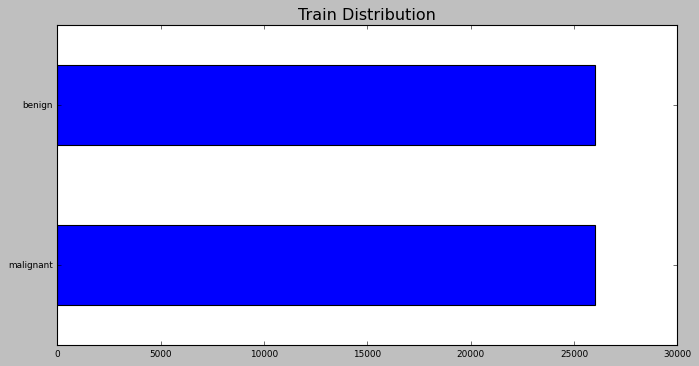

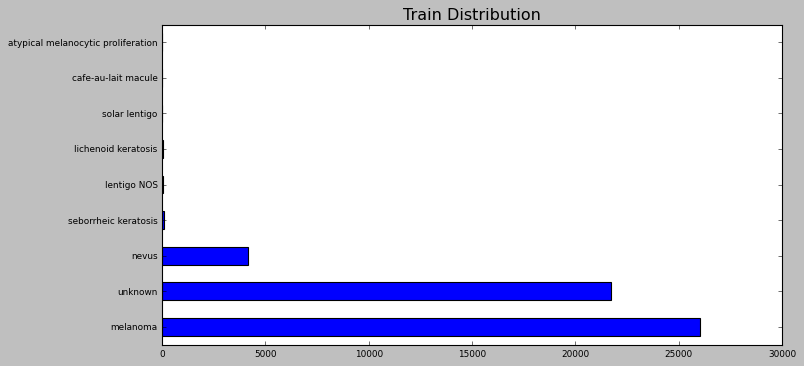

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot again upsampled Train distribution
train_data.benign_malignant.value_counts(sort=True, ascending=False).plot(kind="barh", title="Train Distribution", fontsize=8,
                                                                   rot= 0, figsize=(10,5))
plt.savefig('/content/drive/MyDrive/thesis/outputs/train_data_diagnosis(upsampled).png', bbox_inches='tight')
plt.show()
plt.clf()

train_data.diagnosis.value_counts(sort=True, ascending=False).plot(kind="barh", title="Train Distribution", fontsize=8, rot= 0, figsize=(10,5))
plt.show()
plt.clf()


Export train and test set for later data visualization.

In [ ]:
# Export train and test set for later data visualization
train_data.to_csv('/content/drive/MyDrive/thesis/outputs/temp_train.csv', index=False)
valid_data.to_csv('/content/drive/MyDrive/thesis/outputs/temp_valid.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/thesis/outputs/temp_test.csv', index=False)

Add class weight to make the models more sensitive to melanoma.

In [ ]:
classes = df_train[['benign_malignant', 'target']].sort_values('target').drop_duplicates()['benign_malignant'].to_numpy()
classes

array(['benign', 'malignant'], dtype=object)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
print(df_train['benign_malignant'].value_counts())
# # Add class weight to make the models more sensitive to melanoma

# """
# {'atypical melanocytic proliferation': 0, 'cafe-au-lait macule': 1, 
# 'lentigo NOS': 2, 'lichenoid keratosis': 3, 'melanoma': 4, 'nevus': 5, 
# 'seborrheic keratosis': 6, 'solar lentigo': 7, 'unknown': 8}        ========> X

# => ['benign', 'malignant']
# """

class_weight = [ (32542/(32542+584))*4 if diagnosis == 'malignant' else (584/(32542+584)) for diagnosis in classes ]
class_weight_ts = torch.FloatTensor(class_weight)
class_weight_ts.to(device)

benign       32542
malignant      584
Name: benign_malignant, dtype: int64


tensor([0.0176, 3.9295], device='cuda:0')

Define Train and Valid dataloader.

In [ ]:
image_size = 128

train_transforms = albumentations.Compose([
        albumentations.Transpose(p=0.5),
        albumentations.VerticalFlip(p=0.5),
        albumentations.HorizontalFlip(p=0.5),
        albumentations.RandomBrightness(limit=0.2, p=0.75),
        albumentations.RandomContrast(limit=0.2, p=0.75),
        albumentations.OneOf([
            albumentations.MotionBlur(blur_limit=5),
            albumentations.MedianBlur(blur_limit=5),
            albumentations.GaussianBlur(blur_limit=5),
            albumentations.GaussNoise(var_limit=(5.0, 30.0)),
        ], p=0.7),

        albumentations.OneOf([
            albumentations.OpticalDistortion(distort_limit=1.0),
            albumentations.GridDistortion(num_steps=5, distort_limit=1.),
            albumentations.ElasticTransform(alpha=3),
        ], p=0.7),

        albumentations.CLAHE(clip_limit=4.0, p=0.7),
        albumentations.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
        albumentations.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
        albumentations.Resize(image_size, image_size),
        albumentations.Cutout(max_h_size=int(image_size * 0.375), max_w_size=int(image_size * 0.375), num_holes=1, p=0.7),
        albumentations.Normalize()
    ])

test_transforms = albumentations.Compose([
        albumentations.Resize(image_size, image_size),
        albumentations.Normalize()
    ])

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:1701: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:1727: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:1852: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  "blur_limit and sigma_limit minimum value can not be both equal to 0. "
/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:645: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


In [ ]:
# train_set = MelanomaDataset(train_data, transform=train_transforms)
train_set = MelanomaDataset(train_data, transform=train_transforms)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True,  num_workers=2)

valid_set = MelanomaDataset(valid_data, transform=test_transforms)
# valid_set = MelanomaDataset(valid_data)
valid_loader = DataLoader(valid_set, batch_size=16, shuffle=False, num_workers=1)

### Train and Predict

In [ ]:
model = model.to(device)
allconv = model.to(device)
# resnet = resnet.to(device)
# att_model = att_model.to(device)

##### Allconv_upsampled

In [ ]:
from torchsummary import summary
summary(allconv, (3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 96, 128, 128]           2,688
            Conv2d-2         [-1, 96, 128, 128]          83,040
            Conv2d-3           [-1, 96, 64, 64]          83,040
            Conv2d-4          [-1, 192, 64, 64]         166,080
            Conv2d-5          [-1, 192, 64, 64]         331,968
            Conv2d-6          [-1, 192, 32, 32]         331,968
            Conv2d-7          [-1, 192, 32, 32]         331,968
            Conv2d-8          [-1, 192, 32, 32]          37,056
            Conv2d-9            [-1, 2, 32, 32]             386
Total params: 1,368,194
Trainable params: 1,368,194
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 43.52
Params size (MB): 5.22
Estimated Total Size (MB): 48.92
-------------------------------------

In [ ]:
epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# loss = torch.nn.CrossEntropyLoss(weight=class_weight_ts)
loss = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

loss = loss.to(device)

running_loss = np.zeros((epochs, len(train_loader)))
running_train_acc = np.zeros(epochs)
running_valid_acc = np.zeros(epochs)
# auc = np.zeros(epochs)

best_accuracy = 0

In [ ]:
# sys.stdout = open(os.path.join(model_dir, 'AttConv_output(1).txt'), 'w')

start_time = time.time()

for epoch in range(epochs):
    pred_label = []
    actual_label = []

    train_correct = 0
    valid_correct = 0
    scheduler.step()

    for i, (images, labels) in enumerate(tqdm(train_loader)):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        # Forward
        output = allconv(images).to(device)
        # Calculate loss
        err = loss(output, labels)
        # Backward
        err.backward()
        # Update weights
        optimizer.step()

        _, train_predict = torch.max(output.data, 1)
        train_correct += (train_predict.cpu().numpy() == labels.cpu().numpy()).sum()

        # Show training loss at every 100 data points
        if (i+1) % 100 == 0:
            print( "[Epoch {}/{}] At step {} of {}: Training loss = {:.4f}".
                format(epoch + 1, epochs, i + 1, len(train_loader), err.item()) )
        
        # Add to running loss
        running_loss[epoch, i] = err.item()

    # Accuracy at each epoch: add to tracking
    running_train_acc[epoch] = train_correct / len(train_set) * 100
    print("[Epoch {}/{}] -----> Training accuracy = {:.4f}".format(epoch+1, epochs, running_train_acc[epoch]))

    allconv.eval()


    for i, (images, labels) in enumerate(tqdm(valid_loader)):
        images, labels = images.to(device), labels.to(device)
        output = allconv(images).to(device)

        _, valid_predict = torch.max(output.data, 1)
        valid_correct += (valid_predict.cpu().numpy() == labels.cpu().numpy()).sum()

        for i in range(len(labels)):
            pred_label.append(valid_predict.cpu().numpy()[i])
            actual_label.append(labels.cpu().numpy()[i])
    
    # Accuracy at each epoch: add to tracking, print
    running_valid_acc[epoch] = valid_correct / len(valid_set) * 100

    print( "Accuracy of network on test set at epoch {} of {}:\t{}/{} = {:.2f}%".
          format(epoch + 1, epochs, valid_correct, len(valid_set), running_valid_acc[epoch]) )

    if best_accuracy < running_valid_acc[epoch]:
        best_accuracy = running_valid_acc[epoch]
        print( "*** Best Accuracy: {:.2f}% ***".format(best_accuracy) )
        pd.DataFrame(list(zip(actual_label, pred_label)), columns=['True Label', 'Predicted Label']).to_csv(os.path.join(model_dir, 'test_allconv_weighted1.csv'), index=False)
    if epoch == (epochs - 1):
        pd.DataFrame(list(zip(actual_label, pred_label)), columns=['True Label', 'Predicted Label']).to_csv(os.path.join(model_dir, 'test_allconv_weighted2.csv'), index=False)


    print("=================================")

end_time = time.time()
print("training time: {:0.1f} sec.".format(end_time - start_time))



/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


[Epoch 1/10] At step 100 of 1628: Training loss = 0.5548
[Epoch 1/10] At step 200 of 1628: Training loss = 0.5413
[Epoch 1/10] At step 300 of 1628: Training loss = 0.4867
[Epoch 1/10] At step 400 of 1628: Training loss = 0.4580
[Epoch 1/10] At step 500 of 1628: Training loss = 0.4883
[Epoch 1/10] At step 600 of 1628: Training loss = 0.6205
[Epoch 1/10] At step 700 of 1628: Training loss = 0.4034
[Epoch 1/10] At step 800 of 1628: Training loss = 0.4789
[Epoch 1/10] At step 900 of 1628: Training loss = 0.4664
[Epoch 1/10] At step 1000 of 1628: Training loss = 0.4629
[Epoch 1/10] At step 1100 of 1628: Training loss = 0.4901
[Epoch 1/10] At step 1200 of 1628: Training loss = 0.3672
[Epoch 1/10] At step 1300 of 1628: Training loss = 0.3918
[Epoch 1/10] At step 1400 of 1628: Training loss = 0.3627
[Epoch 1/10] At step 1500 of 1628: Training loss = 0.4585
[Epoch 1/10] At step 1600 of 1628: Training loss = 0.4569

[Epoch 1/10] -----> Training accuracy = 77.2212


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Accuracy of network on test set at epoch 1 of 10:	4968/6626 = 74.98%
*** Best Accuracy: 74.98% ***


[Epoch 2/10] At step 100 of 1628: Training loss = 0.4658
[Epoch 2/10] At step 200 of 1628: Training loss = 0.6304
[Epoch 2/10] At step 300 of 1628: Training loss = 0.3787
[Epoch 2/10] At step 400 of 1628: Training loss = 0.6869
[Epoch 2/10] At step 500 of 1628: Training loss = 0.3581
[Epoch 2/10] At step 600 of 1628: Training loss = 0.4543
[Epoch 2/10] At step 700 of 1628: Training loss = 0.5497
[Epoch 2/10] At step 800 of 1628: Training loss = 0.6964
[Epoch 2/10] At step 900 of 1628: Training loss = 0.4241
[Epoch 2/10] At step 1000 of 1628: Training loss = 0.3514
[Epoch 2/10] At step 1100 of 1628: Training loss = 0.5797
[Epoch 2/10] At step 1200 of 1628: Training loss = 0.4428
[Epoch 2/10] At step 1300 of 1628: Training loss = 0.4891
[Epoch 2/10] At step 1400 of 1628: Training loss = 0.5395
[Epoch 2/10] At step 1500 of 1628: Training loss = 0.5224
[Epoch 2/10] At step 1600 of 1628: Training loss = 0.4291

[Epoch 2/10] -----> Training accuracy = 78.6118



Accuracy of network on test set at epoch 2 of 10:	4963/6626 = 74.90%


[Epoch 3/10] At step 100 of 1628: Training loss = 0.4642
[Epoch 3/10] At step 200 of 1628: Training loss = 0.3491
[Epoch 3/10] At step 300 of 1628: Training loss = 0.3901
[Epoch 3/10] At step 400 of 1628: Training loss = 0.3502
[Epoch 3/10] At step 500 of 1628: Training loss = 0.2808
[Epoch 3/10] At step 600 of 1628: Training loss = 0.3247
[Epoch 3/10] At step 700 of 1628: Training loss = 0.3763
[Epoch 3/10] At step 800 of 1628: Training loss = 0.3971
[Epoch 3/10] At step 900 of 1628: Training loss = 0.5325
[Epoch 3/10] At step 1000 of 1628: Training loss = 0.4292
[Epoch 3/10] At step 1100 of 1628: Training loss = 0.6350
[Epoch 3/10] At step 1200 of 1628: Training loss = 0.3938
[Epoch 3/10] At step 1300 of 1628: Training loss = 0.3728
[Epoch 3/10] At step 1400 of 1628: Training loss = 0.7651
[Epoch 3/10] At step 1500 of 1628: Training loss = 0.5252
[Epoch 3/10] At step 1600 of 1628: Training loss = 0.4701

[Epoch 3/10] -----> Training accuracy = 79.9101



Accuracy of network on test set at epoch 3 of 10:	5722/6626 = 86.36%
*** Best Accuracy: 86.36% ***


[Epoch 4/10] At step 100 of 1628: Training loss = 0.4856
[Epoch 4/10] At step 200 of 1628: Training loss = 0.3395
[Epoch 4/10] At step 300 of 1628: Training loss = 0.3031
[Epoch 4/10] At step 400 of 1628: Training loss = 0.5308
[Epoch 4/10] At step 500 of 1628: Training loss = 0.4953
[Epoch 4/10] At step 600 of 1628: Training loss = 0.1963
[Epoch 4/10] At step 700 of 1628: Training loss = 0.3131
[Epoch 4/10] At step 800 of 1628: Training loss = 0.3766
[Epoch 4/10] At step 900 of 1628: Training loss = 0.4611
[Epoch 4/10] At step 1000 of 1628: Training loss = 0.3640
[Epoch 4/10] At step 1100 of 1628: Training loss = 0.3665
[Epoch 4/10] At step 1200 of 1628: Training loss = 0.4086
[Epoch 4/10] At step 1300 of 1628: Training loss = 0.4237
[Epoch 4/10] At step 1400 of 1628: Training loss = 0.3099
[Epoch 4/10] At step 1500 of 1628: Training loss = 0.3474
[Epoch 4/10] At step 1600 of 1628: Training loss = 0.4408

[Epoch 4/10] -----> Training accuracy = 80.9588



Accuracy of network on test set at epoch 4 of 10:	5248/6626 = 79.20%


[Epoch 5/10] At step 100 of 1628: Training loss = 0.4048
[Epoch 5/10] At step 200 of 1628: Training loss = 0.3309
[Epoch 5/10] At step 300 of 1628: Training loss = 0.4452
[Epoch 5/10] At step 400 of 1628: Training loss = 0.1843
[Epoch 5/10] At step 500 of 1628: Training loss = 0.3263
[Epoch 5/10] At step 600 of 1628: Training loss = 0.2917
[Epoch 5/10] At step 700 of 1628: Training loss = 0.3968
[Epoch 5/10] At step 800 of 1628: Training loss = 0.3942
[Epoch 5/10] At step 900 of 1628: Training loss = 0.4767
[Epoch 5/10] At step 1000 of 1628: Training loss = 0.2056
[Epoch 5/10] At step 1100 of 1628: Training loss = 0.4116
[Epoch 5/10] At step 1200 of 1628: Training loss = 0.3360
[Epoch 5/10] At step 1300 of 1628: Training loss = 0.3455
[Epoch 5/10] At step 1400 of 1628: Training loss = 0.3029
[Epoch 5/10] At step 1500 of 1628: Training loss = 0.1384
[Epoch 5/10] At step 1600 of 1628: Training loss = 0.3349

[Epoch 5/10] -----> Training accuracy = 83.6458



Accuracy of network on test set at epoch 5 of 10:	5604/6626 = 84.58%


[Epoch 6/10] At step 100 of 1628: Training loss = 0.3509
[Epoch 6/10] At step 200 of 1628: Training loss = 0.2419
[Epoch 6/10] At step 300 of 1628: Training loss = 0.4474
[Epoch 6/10] At step 400 of 1628: Training loss = 0.2538
[Epoch 6/10] At step 500 of 1628: Training loss = 0.4536
[Epoch 6/10] At step 600 of 1628: Training loss = 0.4127
[Epoch 6/10] At step 700 of 1628: Training loss = 0.1489
[Epoch 6/10] At step 800 of 1628: Training loss = 0.3847
[Epoch 6/10] At step 900 of 1628: Training loss = 0.3019
[Epoch 6/10] At step 1000 of 1628: Training loss = 0.5244
[Epoch 6/10] At step 1100 of 1628: Training loss = 0.4531
[Epoch 6/10] At step 1200 of 1628: Training loss = 0.4505
[Epoch 6/10] At step 1300 of 1628: Training loss = 0.3607
[Epoch 6/10] At step 1400 of 1628: Training loss = 0.2564
[Epoch 6/10] At step 1500 of 1628: Training loss = 0.3677
[Epoch 6/10] At step 1600 of 1628: Training loss = 0.4004

[Epoch 6/10] -----> Training accuracy = 84.6541



Accuracy of network on test set at epoch 6 of 10:	5592/6626 = 84.39%


[Epoch 7/10] At step 100 of 1628: Training loss = 0.4297
[Epoch 7/10] At step 200 of 1628: Training loss = 0.5706
[Epoch 7/10] At step 300 of 1628: Training loss = 0.4737
[Epoch 7/10] At step 400 of 1628: Training loss = 0.2774
[Epoch 7/10] At step 500 of 1628: Training loss = 0.2974
[Epoch 7/10] At step 600 of 1628: Training loss = 0.2494
[Epoch 7/10] At step 700 of 1628: Training loss = 0.3137
[Epoch 7/10] At step 800 of 1628: Training loss = 0.4878
[Epoch 7/10] At step 900 of 1628: Training loss = 0.3308
[Epoch 7/10] At step 1000 of 1628: Training loss = 0.2358
[Epoch 7/10] At step 1100 of 1628: Training loss = 0.4259
[Epoch 7/10] At step 1200 of 1628: Training loss = 0.3165
[Epoch 7/10] At step 1300 of 1628: Training loss = 0.3865
[Epoch 7/10] At step 1400 of 1628: Training loss = 0.3206
[Epoch 7/10] At step 1500 of 1628: Training loss = 0.3904
[Epoch 7/10] At step 1600 of 1628: Training loss = 0.2473

[Epoch 7/10] -----> Training accuracy = 84.8423



Accuracy of network on test set at epoch 7 of 10:	5618/6626 = 84.79%


[Epoch 8/10] At step 100 of 1628: Training loss = 0.3328
[Epoch 8/10] At step 200 of 1628: Training loss = 0.3585
[Epoch 8/10] At step 300 of 1628: Training loss = 0.3250
[Epoch 8/10] At step 400 of 1628: Training loss = 0.2673
[Epoch 8/10] At step 500 of 1628: Training loss = 0.2789
[Epoch 8/10] At step 600 of 1628: Training loss = 0.4262
[Epoch 8/10] At step 700 of 1628: Training loss = 0.2950
[Epoch 8/10] At step 800 of 1628: Training loss = 0.2733
[Epoch 8/10] At step 900 of 1628: Training loss = 0.3382
[Epoch 8/10] At step 1000 of 1628: Training loss = 0.2338
[Epoch 8/10] At step 1100 of 1628: Training loss = 0.3081
[Epoch 8/10] At step 1200 of 1628: Training loss = 0.4928
[Epoch 8/10] At step 1300 of 1628: Training loss = 0.3825
[Epoch 8/10] At step 1400 of 1628: Training loss = 0.3432
[Epoch 8/10] At step 1500 of 1628: Training loss = 0.1904
[Epoch 8/10] At step 1600 of 1628: Training loss = 0.2658

[Epoch 8/10] -----> Training accuracy = 85.2514



Accuracy of network on test set at epoch 8 of 10:	5677/6626 = 85.68%


[Epoch 9/10] At step 100 of 1628: Training loss = 0.2858
[Epoch 9/10] At step 200 of 1628: Training loss = 0.2707
[Epoch 9/10] At step 300 of 1628: Training loss = 0.2527
[Epoch 9/10] At step 400 of 1628: Training loss = 0.4642
[Epoch 9/10] At step 500 of 1628: Training loss = 0.4724
[Epoch 9/10] At step 600 of 1628: Training loss = 0.2569
[Epoch 9/10] At step 700 of 1628: Training loss = 0.2368
[Epoch 9/10] At step 800 of 1628: Training loss = 0.5825
[Epoch 9/10] At step 900 of 1628: Training loss = 0.5169
[Epoch 9/10] At step 1000 of 1628: Training loss = 0.2898
[Epoch 9/10] At step 1100 of 1628: Training loss = 0.4117
[Epoch 9/10] At step 1200 of 1628: Training loss = 0.4151
[Epoch 9/10] At step 1300 of 1628: Training loss = 0.3531
[Epoch 9/10] At step 1400 of 1628: Training loss = 0.4239
[Epoch 9/10] At step 1500 of 1628: Training loss = 0.3181
[Epoch 9/10] At step 1600 of 1628: Training loss = 0.3263

[Epoch 9/10] -----> Training accuracy = 85.6605



Accuracy of network on test set at epoch 9 of 10:	5671/6626 = 85.59%


[Epoch 10/10] At step 100 of 1628: Training loss = 0.4941
[Epoch 10/10] At step 200 of 1628: Training loss = 0.4099
[Epoch 10/10] At step 300 of 1628: Training loss = 0.3380
[Epoch 10/10] At step 400 of 1628: Training loss = 0.3752
[Epoch 10/10] At step 500 of 1628: Training loss = 0.1765
[Epoch 10/10] At step 600 of 1628: Training loss = 0.2641
[Epoch 10/10] At step 700 of 1628: Training loss = 0.2608
[Epoch 10/10] At step 800 of 1628: Training loss = 0.4863
[Epoch 10/10] At step 900 of 1628: Training loss = 0.2330
[Epoch 10/10] At step 1000 of 1628: Training loss = 0.1892
[Epoch 10/10] At step 1100 of 1628: Training loss = 0.2049
[Epoch 10/10] At step 1200 of 1628: Training loss = 0.1904
[Epoch 10/10] At step 1300 of 1628: Training loss = 0.3446
[Epoch 10/10] At step 1400 of 1628: Training loss = 0.3887
[Epoch 10/10] At step 1500 of 1628: Training loss = 0.3943
[Epoch 10/10] At step 1600 of 1628: Training loss = 0.2789

[Epoch 10/10] -----> Training accuracy = 85.8084



Accuracy of network on test set at epoch 10 of 10:	5694/6626 = 85.93%
training time: 10552.0 sec.


In [ ]:
pd.DataFrame(list(running_loss.transpose()), columns=['1','2','3','4','5',
                                                      '6','7','8','9','10']).to_csv(
    os.path.join(model_dir, 'running_loss_allconv.csv'), index=False)
pd.DataFrame(running_valid_acc).to_csv(
    os.path.join(model_dir, 'val_acc_resnet_allconv.csv'), index=False)
pd.DataFrame(running_train_acc).to_csv(
    os.path.join(model_dir, 'train_acc_resnet_allconv.csv'), index=False)

torch.save(allconv.state_dict(), '/content/drive/MyDrive/thesis/models/allconv.pt')

[[5639  870]
 [  34   83]]


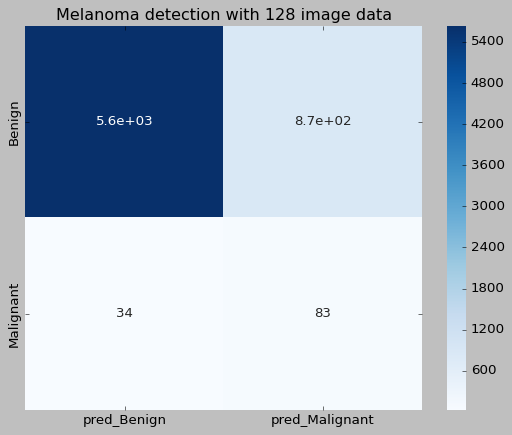

[[5608  901]
 [  31   86]]


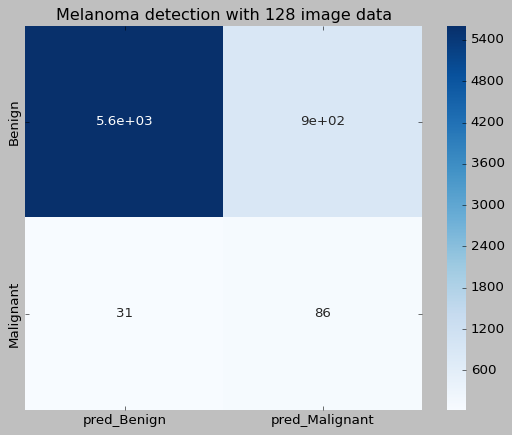

In [ ]:
result = pd.read_csv('/content/drive/MyDrive/thesis/models/test_allconv_weighted1.csv')
y_true = result['True Label'].values
y_pred = result['Predicted Label'].values

cfm = confusion_matrix(y_true, y_pred)
print(cfm)
plt.title('Melanoma detection with 128 image data')
sns.heatmap(cfm, annot=True, cmap='Blues', xticklabels=['pred_Benign', 'pred_Malignant'], yticklabels=['Benign','Malignant'])
plt.show()

result = pd.read_csv('/content/drive/MyDrive/thesis/models/test_allconv_weighted2.csv')
y_true = result['True Label'].values
y_pred = result['Predicted Label'].values

cfm = confusion_matrix(y_true, y_pred)
print(cfm)
plt.title('Melanoma detection with 128 image data')
sns.heatmap(cfm, annot=True, cmap='Blues', xticklabels=['pred_Benign', 'pred_Malignant'], yticklabels=['Benign','Malignant'])
plt.show()

##### AlexNet_upsampled

In [ ]:
# train_set = MelanomaDataset(train_data, transform=train_transforms)
train_set = MelanomaDataset(train_data, transform=train_transforms)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True,  num_workers=2)

valid_set = MelanomaDataset(valid_data, transform=test_transforms)
# valid_set = MelanomaDataset(valid_data)
valid_loader = DataLoader(valid_set, batch_size=16, shuffle=False, num_workers=1)

In [ ]:
from torchsummary import summary
model.to(device)
summary(model, (3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 31, 31]          23,296
              ReLU-2           [-1, 64, 31, 31]               0
         MaxPool2d-3           [-1, 64, 15, 15]               0
            Conv2d-4          [-1, 192, 15, 15]         307,392
              ReLU-5          [-1, 192, 15, 15]               0
         MaxPool2d-6            [-1, 192, 7, 7]               0
            Conv2d-7            [-1, 384, 7, 7]         663,936
              ReLU-8            [-1, 384, 7, 7]               0
            Conv2d-9            [-1, 256, 7, 7]         884,992
             ReLU-10            [-1, 256, 7, 7]               0
           Conv2d-11            [-1, 256, 7, 7]         590,080
             ReLU-12            [-1, 256, 7, 7]               0
        MaxPool2d-13            [-1, 256, 3, 3]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# loss = torch.nn.CrossEntropyLoss(weight=class_weight_ts)
loss = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

loss = loss.to(device)

In [ ]:
running_loss = np.zeros((epochs, len(train_loader)))
running_train_acc = np.zeros(epochs)
running_valid_acc = np.zeros(epochs)
# auc = np.zeros(epochs)

best_accuracy = 0

In [ ]:
# sys.stdout = open(os.path.join(model_dir, 'AttConv_output(1).txt'), 'w')

start_time = time.time()

for epoch in range(epochs):
    pred_label = []
    actual_label = []

    train_correct = 0
    valid_correct = 0
    scheduler.step()

    for i, (images, labels) in enumerate(tqdm(train_loader)):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        # Forward
        output = model(images).to(device)
        # Calculate loss
        err = loss(output, labels)
        # Backward
        err.backward()
        # Update weights
        optimizer.step()

        _, train_predict = torch.max(output.data, 1)
        train_correct += (train_predict.cpu().numpy() == labels.cpu().numpy()).sum()

        # Show training loss at every 100 data points
        if (i+1) % 100 == 0:
            print( "[Epoch {}/{}] At step {} of {}: Training loss = {:.4f}".
                format(epoch + 1, epochs, i + 1, len(train_loader), err.item()) )
        
        # Add to running loss
        running_loss[epoch, i] = err.item()

    # Accuracy at each epoch: add to tracking
    running_train_acc[epoch] = train_correct / len(train_set) * 100
    print("[Epoch {}/{}] -----> Training accuracy = {:.4f}".format(epoch+1, epochs, running_train_acc[epoch]))

    model.eval()


    for i, (images, labels) in enumerate(tqdm(valid_loader)):
        images, labels = images.to(device), labels.to(device)
        output = model(images).to(device)

        _, valid_predict = torch.max(output.data, 1)
        valid_correct += (valid_predict.cpu().numpy() == labels.cpu().numpy()).sum()

        for i in range(len(labels)):
            pred_label.append(valid_predict.cpu().numpy()[i])
            actual_label.append(labels.cpu().numpy()[i])
    
    # Accuracy at each epoch: add to tracking, print
    running_valid_acc[epoch] = valid_correct / len(valid_set) * 100

    print( "Accuracy of network on test set at epoch {} of {}:\t{}/{} = {:.2f}%".
          format(epoch + 1, epochs, valid_correct, len(valid_set), running_valid_acc[epoch]) )


    if best_accuracy < running_valid_acc[epoch]:
        best_accuracy = running_valid_acc[epoch]
        print( "*** Best Accuracy: {:.2f}% ***".format(best_accuracy) )
        pd.DataFrame(list(zip(actual_label, pred_label)), columns=['True Label', 'Predicted Label']).to_csv(os.path.join(model_dir, 'valid_alexnet1.csv'), index=False)
    if epoch == (epochs - 1):
        pd.DataFrame(list(zip(actual_label, pred_label)), columns=['True Label', 'Predicted Label']).to_csv(os.path.join(model_dir, 'valid_alexnet2.csv'), index=False)

    print("=================================")

end_time = time.time()
print("training time: {:0.1f} sec.".format(end_time - start_time))


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


[Epoch 1/10] At step 100 of 1628: Training loss = 0.2544
[Epoch 1/10] At step 200 of 1628: Training loss = 0.3727
[Epoch 1/10] At step 300 of 1628: Training loss = 0.3104
[Epoch 1/10] At step 400 of 1628: Training loss = 0.2907
[Epoch 1/10] At step 500 of 1628: Training loss = 0.3122
[Epoch 1/10] At step 600 of 1628: Training loss = 0.6195
[Epoch 1/10] At step 700 of 1628: Training loss = 0.4253
[Epoch 1/10] At step 800 of 1628: Training loss = 0.3237
[Epoch 1/10] At step 900 of 1628: Training loss = 0.3302
[Epoch 1/10] At step 1000 of 1628: Training loss = 0.3487
[Epoch 1/10] At step 1100 of 1628: Training loss = 0.4151
[Epoch 1/10] At step 1200 of 1628: Training loss = 0.3146
[Epoch 1/10] At step 1300 of 1628: Training loss = 0.3705
[Epoch 1/10] At step 1400 of 1628: Training loss = 0.3545
[Epoch 1/10] At step 1500 of 1628: Training loss = 0.4673
[Epoch 1/10] At step 1600 of 1628: Training loss = 0.4705

[Epoch 1/10] -----> Training accuracy = 83.8052


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Accuracy of network on test set at epoch 1 of 10:	2985/3313 = 90.10%
*** Best Accuracy: 90.10% ***


[Epoch 2/10] At step 100 of 1628: Training loss = 0.3283
[Epoch 2/10] At step 200 of 1628: Training loss = 0.4431
[Epoch 2/10] At step 300 of 1628: Training loss = 0.3194
[Epoch 2/10] At step 400 of 1628: Training loss = 0.3650
[Epoch 2/10] At step 500 of 1628: Training loss = 0.3382
[Epoch 2/10] At step 600 of 1628: Training loss = 0.2648
[Epoch 2/10] At step 700 of 1628: Training loss = 0.2445
[Epoch 2/10] At step 800 of 1628: Training loss = 0.2911
[Epoch 2/10] At step 900 of 1628: Training loss = 0.2873
[Epoch 2/10] At step 1000 of 1628: Training loss = 0.4618
[Epoch 2/10] At step 1100 of 1628: Training loss = 0.3669
[Epoch 2/10] At step 1200 of 1628: Training loss = 0.3860
[Epoch 2/10] At step 1300 of 1628: Training loss = 0.4834
[Epoch 2/10] At step 1400 of 1628: Training loss = 0.3893
[Epoch 2/10] At step 1500 of 1628: Training loss = 0.3256
[Epoch 2/10] At step 1600 of 1628: Training loss = 0.2853

[Epoch 2/10] -----> Training accuracy = 84.4620



Accuracy of network on test set at epoch 2 of 10:	2852/3313 = 86.09%


[Epoch 3/10] At step 100 of 1628: Training loss = 0.3890
[Epoch 3/10] At step 200 of 1628: Training loss = 0.5312
[Epoch 3/10] At step 300 of 1628: Training loss = 0.1524
[Epoch 3/10] At step 400 of 1628: Training loss = 0.4770
[Epoch 3/10] At step 500 of 1628: Training loss = 0.6108
[Epoch 3/10] At step 600 of 1628: Training loss = 0.3116
[Epoch 3/10] At step 700 of 1628: Training loss = 0.3269
[Epoch 3/10] At step 800 of 1628: Training loss = 0.4026
[Epoch 3/10] At step 900 of 1628: Training loss = 0.2788
[Epoch 3/10] At step 1000 of 1628: Training loss = 0.2073
[Epoch 3/10] At step 1100 of 1628: Training loss = 0.2565
[Epoch 3/10] At step 1200 of 1628: Training loss = 0.2993
[Epoch 3/10] At step 1300 of 1628: Training loss = 0.2338
[Epoch 3/10] At step 1400 of 1628: Training loss = 0.3512
[Epoch 3/10] At step 1500 of 1628: Training loss = 0.3248
[Epoch 3/10] At step 1600 of 1628: Training loss = 0.3709

[Epoch 3/10] -----> Training accuracy = 85.1477



Accuracy of network on test set at epoch 3 of 10:	2913/3313 = 87.93%


[Epoch 4/10] At step 100 of 1628: Training loss = 0.1614
[Epoch 4/10] At step 200 of 1628: Training loss = 0.4072
[Epoch 4/10] At step 300 of 1628: Training loss = 0.4042
[Epoch 4/10] At step 400 of 1628: Training loss = 0.2611
[Epoch 4/10] At step 500 of 1628: Training loss = 0.2601
[Epoch 4/10] At step 600 of 1628: Training loss = 0.3145
[Epoch 4/10] At step 700 of 1628: Training loss = 0.2162
[Epoch 4/10] At step 800 of 1628: Training loss = 0.3105
[Epoch 4/10] At step 900 of 1628: Training loss = 0.3103
[Epoch 4/10] At step 1000 of 1628: Training loss = 0.4037
[Epoch 4/10] At step 1100 of 1628: Training loss = 0.2737
[Epoch 4/10] At step 1200 of 1628: Training loss = 0.2063
[Epoch 4/10] At step 1300 of 1628: Training loss = 0.2693
[Epoch 4/10] At step 1400 of 1628: Training loss = 0.2583
[Epoch 4/10] At step 1500 of 1628: Training loss = 0.4574
[Epoch 4/10] At step 1600 of 1628: Training loss = 0.3288

[Epoch 4/10] -----> Training accuracy = 85.9813



Accuracy of network on test set at epoch 4 of 10:	2815/3313 = 84.97%


[Epoch 5/10] At step 100 of 1628: Training loss = 0.1487
[Epoch 5/10] At step 200 of 1628: Training loss = 0.3938
[Epoch 5/10] At step 300 of 1628: Training loss = 0.2113
[Epoch 5/10] At step 400 of 1628: Training loss = 0.2044
[Epoch 5/10] At step 500 of 1628: Training loss = 0.2661
[Epoch 5/10] At step 600 of 1628: Training loss = 0.3761
[Epoch 5/10] At step 700 of 1628: Training loss = 0.1727
[Epoch 5/10] At step 800 of 1628: Training loss = 0.1326
[Epoch 5/10] At step 900 of 1628: Training loss = 0.2048
[Epoch 5/10] At step 1000 of 1628: Training loss = 0.2779
[Epoch 5/10] At step 1100 of 1628: Training loss = 0.3707
[Epoch 5/10] At step 1200 of 1628: Training loss = 0.2991
[Epoch 5/10] At step 1300 of 1628: Training loss = 0.1900
[Epoch 5/10] At step 1400 of 1628: Training loss = 0.2053
[Epoch 5/10] At step 1500 of 1628: Training loss = 0.3472
[Epoch 5/10] At step 1600 of 1628: Training loss = 0.2466

[Epoch 5/10] -----> Training accuracy = 88.8641



Accuracy of network on test set at epoch 5 of 10:	3039/3313 = 91.73%
*** Best Accuracy: 91.73% ***


[Epoch 6/10] At step 100 of 1628: Training loss = 0.1882
[Epoch 6/10] At step 200 of 1628: Training loss = 0.1446
[Epoch 6/10] At step 300 of 1628: Training loss = 0.1723
[Epoch 6/10] At step 400 of 1628: Training loss = 0.1769
[Epoch 6/10] At step 500 of 1628: Training loss = 0.1990
[Epoch 6/10] At step 600 of 1628: Training loss = 0.3958
[Epoch 6/10] At step 700 of 1628: Training loss = 0.1383
[Epoch 6/10] At step 800 of 1628: Training loss = 0.2500
[Epoch 6/10] At step 900 of 1628: Training loss = 0.1886
[Epoch 6/10] At step 1000 of 1628: Training loss = 0.2349
[Epoch 6/10] At step 1100 of 1628: Training loss = 0.2195
[Epoch 6/10] At step 1200 of 1628: Training loss = 0.2255
[Epoch 6/10] At step 1300 of 1628: Training loss = 0.1919
[Epoch 6/10] At step 1400 of 1628: Training loss = 0.1487
[Epoch 6/10] At step 1500 of 1628: Training loss = 0.1793
[Epoch 6/10] At step 1600 of 1628: Training loss = 0.1641

[Epoch 6/10] -----> Training accuracy = 89.4730



Accuracy of network on test set at epoch 6 of 10:	3073/3313 = 92.76%
*** Best Accuracy: 92.76% ***


[Epoch 7/10] At step 100 of 1628: Training loss = 0.2034
[Epoch 7/10] At step 200 of 1628: Training loss = 0.2217
[Epoch 7/10] At step 300 of 1628: Training loss = 0.1978
[Epoch 7/10] At step 400 of 1628: Training loss = 0.1582
[Epoch 7/10] At step 500 of 1628: Training loss = 0.3840
[Epoch 7/10] At step 600 of 1628: Training loss = 0.2002
[Epoch 7/10] At step 700 of 1628: Training loss = 0.1949
[Epoch 7/10] At step 800 of 1628: Training loss = 0.1834
[Epoch 7/10] At step 900 of 1628: Training loss = 0.1935
[Epoch 7/10] At step 1000 of 1628: Training loss = 0.2123
[Epoch 7/10] At step 1100 of 1628: Training loss = 0.1323
[Epoch 7/10] At step 1200 of 1628: Training loss = 0.4197
[Epoch 7/10] At step 1300 of 1628: Training loss = 0.1266
[Epoch 7/10] At step 1400 of 1628: Training loss = 0.2377
[Epoch 7/10] At step 1500 of 1628: Training loss = 0.1958
[Epoch 7/10] At step 1600 of 1628: Training loss = 0.1706

[Epoch 7/10] -----> Training accuracy = 89.9800



Accuracy of network on test set at epoch 7 of 10:	3096/3313 = 93.45%
*** Best Accuracy: 93.45% ***


[Epoch 8/10] At step 100 of 1628: Training loss = 0.3239
[Epoch 8/10] At step 200 of 1628: Training loss = 0.2481
[Epoch 8/10] At step 300 of 1628: Training loss = 0.4670
[Epoch 8/10] At step 400 of 1628: Training loss = 0.1520
[Epoch 8/10] At step 500 of 1628: Training loss = 0.1492
[Epoch 8/10] At step 600 of 1628: Training loss = 0.1721
[Epoch 8/10] At step 700 of 1628: Training loss = 0.2137
[Epoch 8/10] At step 800 of 1628: Training loss = 0.2093
[Epoch 8/10] At step 900 of 1628: Training loss = 0.1556
[Epoch 8/10] At step 1000 of 1628: Training loss = 0.2460
[Epoch 8/10] At step 1100 of 1628: Training loss = 0.2761
[Epoch 8/10] At step 1200 of 1628: Training loss = 0.2228
[Epoch 8/10] At step 1300 of 1628: Training loss = 0.2053
[Epoch 8/10] At step 1400 of 1628: Training loss = 0.2695
[Epoch 8/10] At step 1500 of 1628: Training loss = 0.2225
[Epoch 8/10] At step 1600 of 1628: Training loss = 0.2456

[Epoch 8/10] -----> Training accuracy = 90.2835



Accuracy of network on test set at epoch 8 of 10:	3113/3313 = 93.96%
*** Best Accuracy: 93.96% ***


[Epoch 9/10] At step 100 of 1628: Training loss = 0.2166
[Epoch 9/10] At step 200 of 1628: Training loss = 0.3412
[Epoch 9/10] At step 300 of 1628: Training loss = 0.1617
[Epoch 9/10] At step 400 of 1628: Training loss = 0.3201
[Epoch 9/10] At step 500 of 1628: Training loss = 0.1264
[Epoch 9/10] At step 600 of 1628: Training loss = 0.5559
[Epoch 9/10] At step 700 of 1628: Training loss = 0.1351
[Epoch 9/10] At step 800 of 1628: Training loss = 0.2497
[Epoch 9/10] At step 900 of 1628: Training loss = 0.1764
[Epoch 9/10] At step 1000 of 1628: Training loss = 0.1990
[Epoch 9/10] At step 1100 of 1628: Training loss = 0.1654
[Epoch 9/10] At step 1200 of 1628: Training loss = 0.2533
[Epoch 9/10] At step 1300 of 1628: Training loss = 0.3687
[Epoch 9/10] At step 1400 of 1628: Training loss = 0.1257
[Epoch 9/10] At step 1500 of 1628: Training loss = 0.1967
[Epoch 9/10] At step 1600 of 1628: Training loss = 0.1593

[Epoch 9/10] -----> Training accuracy = 90.6599



Accuracy of network on test set at epoch 9 of 10:	3090/3313 = 93.27%


[Epoch 10/10] At step 100 of 1628: Training loss = 0.2549
[Epoch 10/10] At step 200 of 1628: Training loss = 0.1231
[Epoch 10/10] At step 300 of 1628: Training loss = 0.2371
[Epoch 10/10] At step 400 of 1628: Training loss = 0.1811
[Epoch 10/10] At step 500 of 1628: Training loss = 0.1961
[Epoch 10/10] At step 600 of 1628: Training loss = 0.2283
[Epoch 10/10] At step 700 of 1628: Training loss = 0.2066
[Epoch 10/10] At step 800 of 1628: Training loss = 0.2145
[Epoch 10/10] At step 900 of 1628: Training loss = 0.2490
[Epoch 10/10] At step 1000 of 1628: Training loss = 0.2550
[Epoch 10/10] At step 1100 of 1628: Training loss = 0.1052
[Epoch 10/10] At step 1200 of 1628: Training loss = 0.2139
[Epoch 10/10] At step 1300 of 1628: Training loss = 0.3216
[Epoch 10/10] At step 1400 of 1628: Training loss = 0.2758
[Epoch 10/10] At step 1500 of 1628: Training loss = 0.1842
[Epoch 10/10] At step 1600 of 1628: Training loss = 0.1863

[Epoch 10/10] -----> Training accuracy = 90.8808



Accuracy of network on test set at epoch 10 of 10:	3114/3313 = 93.99%
*** Best Accuracy: 93.99% ***
training time: 10523.8 sec.


In [ ]:
pd.DataFrame(list(running_loss.transpose()), columns=['Epoch 1', 'Epoch 2', 'Epoch 3', 'Epoch 4', 'Epoch 5', 'Epoch 6', 'Epoch 7', 'Epoch 8', 'Epoch 9', 'Epoch 10']).to_csv(
    os.path.join(model_dir, 'running_loss_alexnet10.csv'), index=False)
pd.DataFrame(running_valid_acc).to_csv(
    os.path.join(model_dir, 'val_acc_alexnet10.csv'), index=False)
pd.DataFrame(running_train_acc).to_csv(
    os.path.join(model_dir, 'train_acc_alexnet10.csv'), index=False)

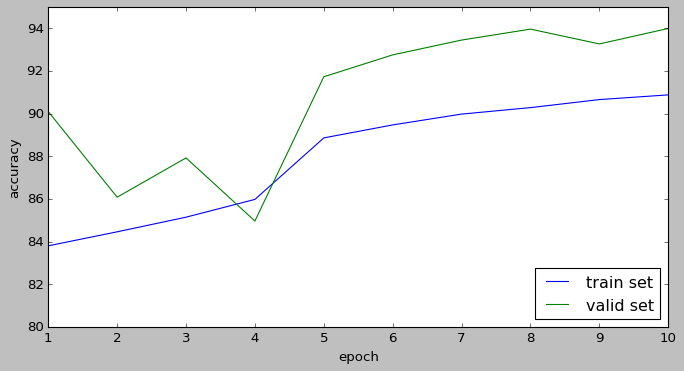

In [ ]:
up_train = pd.read_csv('/content/drive/MyDrive/thesis/models/train_acc_alexnet10.csv')
up_val = pd.read_csv('/content/drive/MyDrive/thesis/models/val_acc_alexnet10.csv')

f = plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), up_train, label='train set')
plt.plot(range(1, epochs+1), up_val, label='valid set')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(80, 95)
plt.savefig('/content/drive/MyDrive/thesis/outputs/accuracy_alexnet10.png', bbox_inches='tight')
plt.show()

[[3083  171]
 [  28   31]]


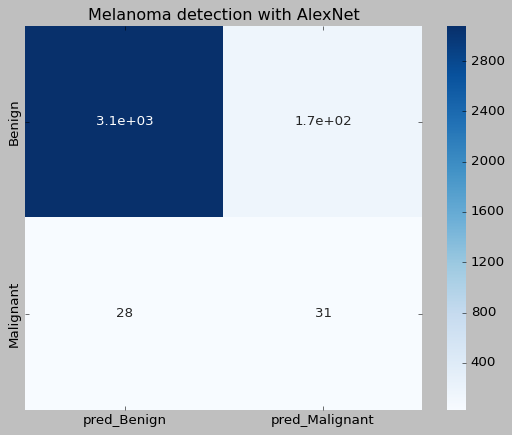

[[3083, 171], [13, 46]]


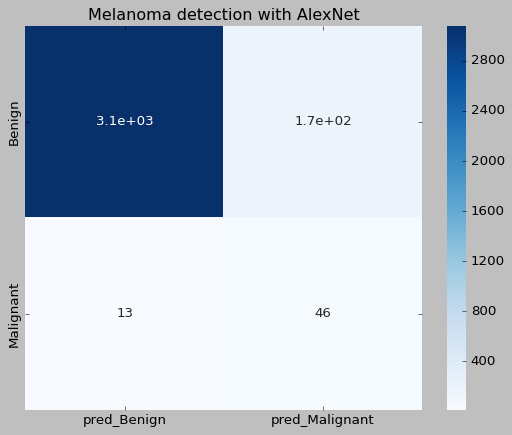

In [ ]:
result = pd.read_csv('/content/drive/MyDrive/thesis/models/valid_alexnet1.csv')
y_true = result['True Label'].values
y_pred = result['Predicted Label'].values

cfm = confusion_matrix(y_true, y_pred)
print(cfm)
f = plt.figure(figsize=(8,6))
plt.title('Melanoma detection with AlexNet')
sns.heatmap(cfm, annot=True, cmap='Blues', xticklabels=['pred_Benign', 'pred_Malignant'], yticklabels=['Benign','Malignant'])
plt.show()

result = pd.read_csv('/content/drive/MyDrive/thesis/models/valid_alexnet2.csv')
y_true = result['True Label'].values
y_pred = result['Predicted Label'].values

f = plt.figure(figsize=(8,6))
plt.title('Melanoma detection with AlexNet')
sns.heatmap(cfm, annot=True, cmap='Blues', xticklabels=['pred_Benign', 'pred_Malignant'], yticklabels=['Benign','Malignant'])
plt.savefig('/content/drive/MyDrive/thesis/outputs/cfm_alexnet10.png', bbox_inches='tight')
plt.show()

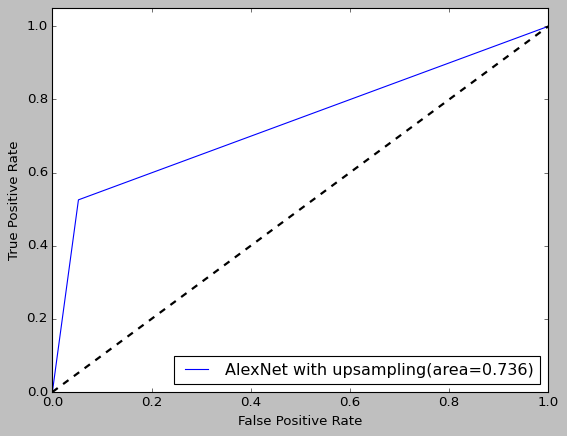

In [ ]:
from sklearn.metrics import auc
f = plt.figure(figsize=(8,6))
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AlexNet with upsampling(area={f:.3f})'.format(f=roc_auc))

# fpr2, tpr2, _ = roc_curve(y_true2, y_pred2)
# roc_auc2 = auc(fpr2, tpr2)
# plt.plot(fpr2, tpr2, label='AlexNet with weight(area={f:.3f})'.format(f=roc_auc2))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title(f'ROC curves - (mean area = {(np.average()):.3f})')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/thesis/outputs/roc_alexnet10.png', bbox_inches='tight')

plt.show()


In [ ]:
torch.save(model.state_dict(), os.path.join(model_dir, 'model_Alexnet10.pt'))

In [ ]:
test_set = MelanomaDataset(test_data, transform=test_transforms)
test_loader = DataLoader(test_set, batch_size=16, shuffle=True, num_workers=1)

In [ ]:
# sys.stdout = open(os.path.join(model_dir, 'AttConv_output(1).txt'), 'w')

test_correct = 0
start_time = time.time()

for i, (images, labels) in enumerate(tqdm(test_loader)):
    images, labels = images.to(device), labels.to(device)
    output = model(images).to(device)

    _, test_predict = torch.max(output.data, 1)
    test_correct += (test_predict.cpu().numpy() == labels.cpu().numpy()).sum()

    for i in range(len(labels)):
        pred_label.append(test_predict.cpu().numpy()[i])
        actual_label.append(labels.cpu().numpy()[i])
    
    # Accuracy at each epoch: add to tracking, print
running_test_acc = test_correct / len(test_set) * 100

print( "Accuracy of network on test set :\t{}/{} = {:.2f}%".
        format(test_correct, len(test_set), running_test_acc) )

end_time = time.time()
print("training time: {:0.1f} sec.".format(end_time - start_time))

pd.DataFrame(list(zip(actual_label, pred_label)), columns=['True Label', 'Predicted Label']).to_csv(os.path.join(model_dir, 'test_alexnet.csv'), index=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Accuracy of network on test set :	3066/3313 = 92.54%
training time: 665.8 sec.


[[6117  392]
 [  54   63]]


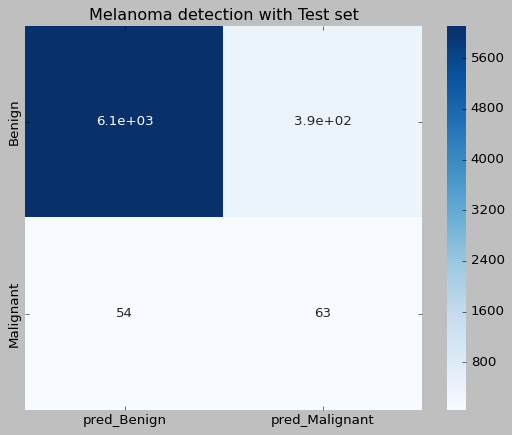

In [ ]:
result = pd.read_csv('/content/drive/MyDrive/thesis/models/test_alexnet.csv')
y_true = result['True Label'].values
y_pred = result['Predicted Label'].values

cfm = confusion_matrix(y_true, y_pred)
print(cfm)
f = plt.figure(figsize=(8,6))
plt.title('Melanoma detection with Test set')
sns.heatmap(cfm, annot=True, cmap='Blues', xticklabels=['pred_Benign', 'pred_Malignant'], yticklabels=['Benign','Malignant'])
plt.savefig('/content/drive/MyDrive/thesis/outputs/cfm_test_alexnet10.png', bbox_inches='tight')

plt.show()



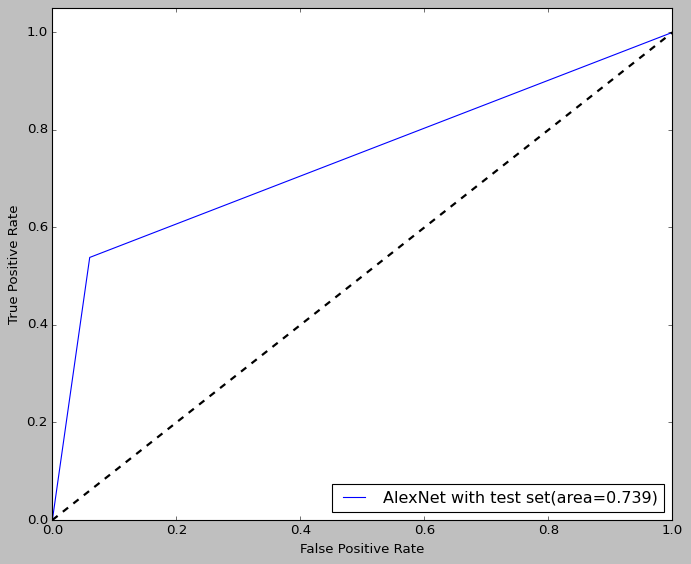

In [ ]:
from sklearn.metrics import auc
f = plt.figure(figsize=(10,8))
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AlexNet with test set(area={f:.3f})'.format(f=roc_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/thesis/outputs/roc_test_alexnet10.png', bbox_inches='tight')

plt.show()


In [ ]:
# sys.stdout = open(os.path.join(model_dir, 'AttConv_output(1).txt'), 'w')

start_time = time.time()

for epoch in range(epochs):
    pred_label = []
    actual_label = []

    train_correct = 0
    valid_correct = 0
    scheduler.step()

    for i, (images, labels) in enumerate(tqdm(train_loader)):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        # Forward
        output = model(images).to(device)
        # Calculate loss
        err = loss(output, labels)
        # Backward
        err.backward()
        # Update weights
        optimizer.step()

        _, train_predict = torch.max(output.data, 1)
        train_correct += (train_predict.cpu().numpy() == labels.cpu().numpy()).sum()

        # Show training loss at every 100 data points
        if (i+1) % 100 == 0:
            print( "[Epoch {}/{}] At step {} of {}: Training loss = {:.4f}".
                format(epoch + 1, epochs, i + 1, len(train_loader), err.item()) )
        
        # Add to running loss
        running_loss[epoch, i] = err.item()

    # Accuracy at each epoch: add to tracking
    running_train_acc[epoch] = train_correct / len(train_set) * 100
    print("[Epoch {}/{}] -----> Training accuracy = {:.4f}".format(epoch+1, epochs, running_train_acc[epoch]))

    model.eval()


    for i, (images, labels) in enumerate(tqdm(valid_loader)):
        images, labels = images.to(device), labels.to(device)
        output = model(images).to(device)

        _, valid_predict = torch.max(output.data, 1)
        valid_correct += (valid_predict.cpu().numpy() == labels.cpu().numpy()).sum()

        for i in range(len(labels)):
            pred_label.append(valid_predict.cpu().numpy()[i])
            actual_label.append(labels.cpu().numpy()[i])
    
    # Accuracy at each epoch: add to tracking, print
    running_valid_acc[epoch] = valid_correct / len(valid_set) * 100

    print( "Accuracy of network on test set at epoch {} of {}:\t{}/{} = {:.2f}%".
          format(epoch + 1, epochs, valid_correct, len(valid_set), running_valid_acc[epoch]) )

    if best_accuracy < running_valid_acc[epoch]:
        best_accuracy = running_valid_acc[epoch]
        print( "*** Best Accuracy: {:.2f}% ***".format(best_accuracy) )
        pd.DataFrame(list(zip(actual_label, pred_label)), columns=['True Label', 'Predicted Label']).to_csv(os.path.join(model_dir, 'test_result_alexnet_upsampled.csv'), index=False)

    print("=================================")

end_time = time.time()
print("training time: {:0.1f} sec.".format(end_time - start_time))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


[Epoch 1/5] At step 100 of 1628: Training loss = 0.4319
[Epoch 1/5] At step 200 of 1628: Training loss = 0.5105
[Epoch 1/5] At step 300 of 1628: Training loss = 0.4618
[Epoch 1/5] At step 400 of 1628: Training loss = 0.4510
[Epoch 1/5] At step 500 of 1628: Training loss = 0.3941
[Epoch 1/5] At step 600 of 1628: Training loss = 0.3460
[Epoch 1/5] At step 700 of 1628: Training loss = 0.3685
[Epoch 1/5] At step 800 of 1628: Training loss = 0.3900
[Epoch 1/5] At step 900 of 1628: Training loss = 0.3645
[Epoch 1/5] At step 1000 of 1628: Training loss = 0.4637
[Epoch 1/5] At step 1100 of 1628: Training loss = 0.3635
[Epoch 1/5] At step 1200 of 1628: Training loss = 0.4673
[Epoch 1/5] At step 1300 of 1628: Training loss = 0.4892
[Epoch 1/5] At step 1400 of 1628: Training loss = 0.5258
[Epoch 1/5] At step 1500 of 1628: Training loss = 0.4632
[Epoch 1/5] At step 1600 of 1628: Training loss = 0.5306

[Epoch 1/5] -----> Training accuracy = 78.3083


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Accuracy of network on test set at epoch 1 of 5:	5364/6626 = 80.95%
*** Best Accuracy: 80.95% ***


[Epoch 2/5] At step 100 of 1628: Training loss = 0.3648
[Epoch 2/5] At step 200 of 1628: Training loss = 0.3859
[Epoch 2/5] At step 300 of 1628: Training loss = 0.4091
[Epoch 2/5] At step 400 of 1628: Training loss = 0.4444
[Epoch 2/5] At step 500 of 1628: Training loss = 0.5757
[Epoch 2/5] At step 600 of 1628: Training loss = 0.4554
[Epoch 2/5] At step 700 of 1628: Training loss = 0.4338
[Epoch 2/5] At step 800 of 1628: Training loss = 0.5681
[Epoch 2/5] At step 900 of 1628: Training loss = 0.4759
[Epoch 2/5] At step 1000 of 1628: Training loss = 0.3325
[Epoch 2/5] At step 1100 of 1628: Training loss = 0.2986
[Epoch 2/5] At step 1200 of 1628: Training loss = 0.4115
[Epoch 2/5] At step 1300 of 1628: Training loss = 0.4099
[Epoch 2/5] At step 1400 of 1628: Training loss = 0.3299
[Epoch 2/5] At step 1500 of 1628: Training loss = 0.5372
[Epoch 2/5] At step 1600 of 1628: Training loss = 0.4586

[Epoch 2/5] -----> Training accuracy = 79.9639



Accuracy of network on test set at epoch 2 of 5:	5220/6626 = 78.78%


[Epoch 3/5] At step 100 of 1628: Training loss = 0.4759
[Epoch 3/5] At step 200 of 1628: Training loss = 0.4565
[Epoch 3/5] At step 300 of 1628: Training loss = 0.3448
[Epoch 3/5] At step 400 of 1628: Training loss = 0.4668
[Epoch 3/5] At step 500 of 1628: Training loss = 0.3116
[Epoch 3/5] At step 600 of 1628: Training loss = 0.3368
[Epoch 3/5] At step 700 of 1628: Training loss = 0.4280
[Epoch 3/5] At step 800 of 1628: Training loss = 0.3403
[Epoch 3/5] At step 900 of 1628: Training loss = 0.3418
[Epoch 3/5] At step 1000 of 1628: Training loss = 0.2856
[Epoch 3/5] At step 1100 of 1628: Training loss = 0.3106
[Epoch 3/5] At step 1200 of 1628: Training loss = 0.2734
[Epoch 3/5] At step 1300 of 1628: Training loss = 0.3475
[Epoch 3/5] At step 1400 of 1628: Training loss = 0.4435
[Epoch 3/5] At step 1500 of 1628: Training loss = 0.4127
[Epoch 3/5] At step 1600 of 1628: Training loss = 0.3324

[Epoch 3/5] -----> Training accuracy = 83.1118



Accuracy of network on test set at epoch 3 of 5:	5622/6626 = 84.85%
*** Best Accuracy: 84.85% ***


[Epoch 4/5] At step 100 of 1628: Training loss = 0.2558
[Epoch 4/5] At step 200 of 1628: Training loss = 0.3851
[Epoch 4/5] At step 300 of 1628: Training loss = 0.3876
[Epoch 4/5] At step 400 of 1628: Training loss = 0.4199
[Epoch 4/5] At step 500 of 1628: Training loss = 0.4158
[Epoch 4/5] At step 600 of 1628: Training loss = 0.4048
[Epoch 4/5] At step 700 of 1628: Training loss = 0.3345
[Epoch 4/5] At step 800 of 1628: Training loss = 0.4183
[Epoch 4/5] At step 900 of 1628: Training loss = 0.3147
[Epoch 4/5] At step 1000 of 1628: Training loss = 0.3026
[Epoch 4/5] At step 1100 of 1628: Training loss = 0.2908
[Epoch 4/5] At step 1200 of 1628: Training loss = 0.3373
[Epoch 4/5] At step 1300 of 1628: Training loss = 0.4828
[Epoch 4/5] At step 1400 of 1628: Training loss = 0.3556
[Epoch 4/5] At step 1500 of 1628: Training loss = 0.3297
[Epoch 4/5] At step 1600 of 1628: Training loss = 0.2124

[Epoch 4/5] -----> Training accuracy = 84.0990



Accuracy of network on test set at epoch 4 of 5:	5739/6626 = 86.61%
*** Best Accuracy: 86.61% ***


[Epoch 5/5] At step 100 of 1628: Training loss = 0.3932
[Epoch 5/5] At step 200 of 1628: Training loss = 0.2821
[Epoch 5/5] At step 300 of 1628: Training loss = 0.3586
[Epoch 5/5] At step 400 of 1628: Training loss = 0.3286
[Epoch 5/5] At step 500 of 1628: Training loss = 0.4280
[Epoch 5/5] At step 600 of 1628: Training loss = 0.2018
[Epoch 5/5] At step 700 of 1628: Training loss = 0.3983
[Epoch 5/5] At step 800 of 1628: Training loss = 0.2647
[Epoch 5/5] At step 900 of 1628: Training loss = 0.4106
[Epoch 5/5] At step 1000 of 1628: Training loss = 0.3134
[Epoch 5/5] At step 1100 of 1628: Training loss = 0.2887
[Epoch 5/5] At step 1200 of 1628: Training loss = 0.2721
[Epoch 5/5] At step 1300 of 1628: Training loss = 0.2194
[Epoch 5/5] At step 1400 of 1628: Training loss = 0.3875
[Epoch 5/5] At step 1500 of 1628: Training loss = 0.3797
[Epoch 5/5] At step 1600 of 1628: Training loss = 0.3391

[Epoch 5/5] -----> Training accuracy = 84.8558



Accuracy of network on test set at epoch 5 of 5:	5577/6626 = 84.17%
training time: 5250.3 sec.


In [ ]:
pd.DataFrame(list(running_loss.transpose()), columns=['Epoch 1', 'Epoch 2', 'Epoch 3', 'Epoch 4', 'Epoch 5',]).to_csv(
    os.path.join(model_dir, 'running_loss_alexnet_upsampled.csv'), index=False)
pd.DataFrame(running_valid_acc).to_csv(
    os.path.join(model_dir, 'val_acc_alexnet_upsampled.csv'), index=False)
pd.DataFrame(running_train_acc).to_csv(
    os.path.join(model_dir, 'train_acc_alexnet_upsampled.csv'), index=False)

[[5649  860]
 [  27   90]]


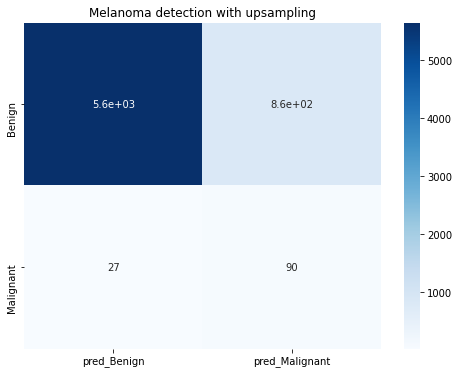

In [ ]:
result = pd.read_csv('/content/drive/MyDrive/thesis/models/test_result_alexnet_upsampled.csv')
y_true = result['True Label'].values
y_pred = result['Predicted Label'].values

cfm = confusion_matrix(y_true, y_pred)
print(cfm)
f = plt.figure(figsize=(8,6))
plt.title('Melanoma detection with upsampling')
sns.heatmap(cfm, annot=True, cmap='Blues', xticklabels=['pred_Benign', 'pred_Malignant'], yticklabels=['Benign','Malignant'])
plt.show()